In [35]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns
import tensorflow as tf

In [2]:
dataset = pd.read_csv("airfoil_self_noise.dat", sep="\t", header=None)

In [3]:
dataset.columns =['frequency', 'angle', 'chord', 'velocity', 'thickness', 'sound']

In [4]:
dataset.head()

,frequency,angle,chord,velocity,thickness,sound
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   frequency  1503 non-null   int64  
 1   angle      1503 non-null   float64
 2   chord      1503 non-null   float64
 3   velocity   1503 non-null   float64
 4   thickness  1503 non-null   float64
 5   sound      1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB
None


<AxesSubplot:>

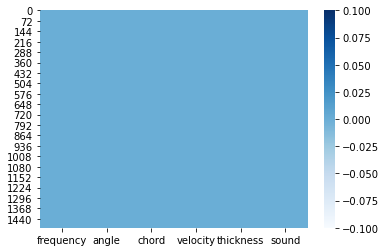

In [6]:
sns.heatmap(dataset.isnull(), cmap="Blues")

In [7]:
dataset.describe()

,frequency,angle,chord,velocity,thickness,sound
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [8]:
print(dataset['frequency'].unique())
print(dataset['angle'].unique())
print(dataset['chord'].unique())
print(dataset['velocity'].unique())
print(dataset['thickness'].unique())

[  800  1000  1250  1600  2000  2500  3150  4000  5000  6300  8000 10000
 12500 16000   500   630   200   250   315   400 20000]
[ 0.   1.5  3.   4.   2.   5.3  7.3  2.7  5.4  7.2  9.9 12.6  4.2  8.4
 11.2 15.4 19.7  4.8  9.5 12.7 17.4 22.2  3.3  6.7  8.9 12.3 15.6]
[0.3048 0.2286 0.1524 0.0508 0.0254 0.1016]
[71.3 55.5 39.6 31.7]
[0.00266337 0.00283081 0.00310138 0.00331266 0.00336729 0.00392107
 0.00425727 0.00452492 0.00495741 0.00529514 0.00497773 0.00579636
 0.00214345 0.00229336 0.00253511 0.0027238  0.00293031 0.00313525
 0.00346574 0.00372371 0.00400603 0.0042862  0.00473801 0.00509068
 0.0051942  0.00614329 0.0104404  0.0111706  0.0123481  0.0132672
 0.0015988  0.00172668 0.00193287 0.00209405 0.00243851 0.00294804
 0.00401199 0.00433288 0.00485029 0.00525474 0.00752039 0.00909175
 0.0193001  0.0208438  0.0233328  0.0252785  0.0483159  0.0584113
 0.00074048 0.00076193 0.00079182 0.00081216 0.00142788 0.00152689
 0.00544854 0.00566229 0.00580776 0.014072   0.0150478  0.0264269


In [9]:
normalize_variable = ["frequency", "angle", "chord", "velocity"]

In [10]:
final_map=[]
for feature in normalize_variable:
    feature = dataset[feature].unique()
    feature.sort()
    temp_map={}
    for index, value in enumerate(feature):
        temp_map.update({value:index})
    final_map.append(temp_map)

In [11]:
for index,feature in enumerate(normalize_variable):
    dataset[feature] = dataset[feature].map(final_map[index])

In [12]:
print(dataset['frequency'].unique())
print(dataset['angle'].unique())
print(dataset['chord'].unique())
print(dataset['velocity'].unique())
print(dataset['thickness'].unique())

[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19  4  5  0  1  2  3 20]
[ 0  1  4  6  2  9 13  3 10 12 17 20  7 14 18 22 25  8 16 21 24 26  5 11
 15 19 23]
[5 4 3 1 0 2]
[3 2 1 0]
[0.00266337 0.00283081 0.00310138 0.00331266 0.00336729 0.00392107
 0.00425727 0.00452492 0.00495741 0.00529514 0.00497773 0.00579636
 0.00214345 0.00229336 0.00253511 0.0027238  0.00293031 0.00313525
 0.00346574 0.00372371 0.00400603 0.0042862  0.00473801 0.00509068
 0.0051942  0.00614329 0.0104404  0.0111706  0.0123481  0.0132672
 0.0015988  0.00172668 0.00193287 0.00209405 0.00243851 0.00294804
 0.00401199 0.00433288 0.00485029 0.00525474 0.00752039 0.00909175
 0.0193001  0.0208438  0.0233328  0.0252785  0.0483159  0.0584113
 0.00074048 0.00076193 0.00079182 0.00081216 0.00142788 0.00152689
 0.00544854 0.00566229 0.00580776 0.014072   0.0150478  0.0264269
 0.0271925  0.0282593  0.0289853  0.0341183  0.036484   0.00040068
 0.00041229 0.00042846 0.00043947 0.00084863 0.00087322 0.00090748
 0.00093079 0.00420654 0.0

In [13]:
from sklearn.model_selection import train_test_split

In [123]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [167]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.33, random_state=42)

In [168]:
len(train_x)

1007

In [228]:
mnistmodel1 = tf.keras.models.Sequential([
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(5,activation=tf.nn.softmax),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(10,activation=tf.nn.softplus),
tf.keras.layers.Dense(10,activation=tf.nn.softplus),
tf.keras.layers.Dense(10,activation=tf.nn.softplus),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(5,activation=tf.nn.softmax)
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(5,activation=tf.nn.softplus)

])

SyntaxError: invalid syntax (<ipython-input-228-a3638fcbf1c0>, line 10)

In [229]:
dataset.head()

,frequency,angle,chord,velocity,thickness,sound
0,6,0,5,3,0.002663,126.201
1,7,0,5,3,0.002663,125.201
2,8,0,5,3,0.002663,125.951
3,9,0,5,3,0.002663,127.591
4,10,0,5,3,0.002663,127.461


In [230]:
len(train_x)

1007

In [231]:
optimiser = tf.keras.optimizers.Adam()
mnistmodel1.compile (optimizer= optimiser, loss='mean_squared_error', metrics = ['accuracy'])

In [232]:
mnistmodel1.fit(train_x, train_y, batch_size=800, epochs=2000)

Epoch 1/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 2/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 3/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 4/2000
2/2 [==============================] - 0s 4ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 5/2000
2/2 [==============================] - 0s 4ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 6/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 7/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 8/2000
2/2 [==============================] - 0s 5ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 9/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 10/2000
2/2 [===========================

2/2 [==============================] - 0s 2ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 78/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 79/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 80/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 81/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 82/2000
2/2 [==============================] - 0s 4ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 83/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 84/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 85/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4580 - accuracy: 0.0000e+00
Epoch 86/2000
2/2 [==============================] 

2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 154/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 155/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 156/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 157/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 158/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 159/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 160/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4580 - accuracy: 0.0000e+00
Epoch 161/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 162/2000
2/2 [=======================

Epoch 229/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 230/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 231/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 232/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 233/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 234/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 235/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4580 - accuracy: 0.0000e+00
Epoch 236/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 237/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 238/2000
2/2 [========

2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 305/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 306/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 307/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 308/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 309/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 310/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 311/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 312/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 313/2000
2/2 [=======================

Epoch 380/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 381/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4580 - accuracy: 0.0000e+00
Epoch 382/2000
2/2 [==============================] - 0s 4ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 383/2000
2/2 [==============================] - 0s 4ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 384/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 385/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 386/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 387/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 388/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 389/2000
2/2 [========

2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 456/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4580 - accuracy: 0.0000e+00
Epoch 457/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 458/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 459/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 460/2000
2/2 [==============================] - 0s 4ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 461/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 462/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 463/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4580 - accuracy: 0.0000e+00
Epoch 464/2000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 531/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4580 - accuracy: 0.0000e+00
Epoch 532/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4580 - accuracy: 0.0000e+00
Epoch 533/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 534/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 535/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 536/2000
2/2 [==============================] - 0s 4ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 537/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 538/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 539/2000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 606/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 607/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 608/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 609/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 610/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 611/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 612/2000
2/2 [==============================] - 0s 4ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 613/2000
2/2 [==============================] - 0s 4ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 614/2000
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 681/2000
2/2 [==============================] - 0s 5ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 682/2000
2/2 [==============================] - 0s 4ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 683/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 684/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 685/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 686/2000
2/2 [==============================] - 0s 4ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 687/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4580 - accuracy: 0.0000e+00
Epoch 688/2000
2/2 [==============================] - 0s 4ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 689/2000
2/2 [=======================

Epoch 756/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 757/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 758/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4580 - accuracy: 0.0000e+00
Epoch 759/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4580 - accuracy: 0.0000e+00
Epoch 760/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 761/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4580 - accuracy: 0.0000e+00
Epoch 762/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4580 - accuracy: 0.0000e+00
Epoch 763/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 764/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 765/2000
2/2 [========

2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 832/2000
2/2 [==============================] - 0s 4ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 833/2000
2/2 [==============================] - 0s 4ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 834/2000
2/2 [==============================] - 0s 5ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 835/2000
2/2 [==============================] - 0s 5ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 836/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 837/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 838/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 839/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 840/2000
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 907/2000
2/2 [==============================] - 0s 4ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 908/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 909/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 910/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 911/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 912/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 913/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 914/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 915/2000
2/2 [=======================

Epoch 982/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 983/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 984/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 985/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 986/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 987/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 988/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 989/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 990/2000
2/2 [==============================] - 0s 4ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 991/2000
2/2 [========

2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 1058/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 1059/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 1060/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 1061/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 1062/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 1063/2000
2/2 [==============================] - 0s 5ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 1064/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 1065/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 1066/2000
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 15608.4580 - accuracy: 0.0000e+00
Epoch 1133/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 1134/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 1135/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 1136/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4580 - accuracy: 0.0000e+00
Epoch 1137/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 1138/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 1139/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4580 - accuracy: 0.0000e+00
Epoch 1140/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 1141/2000
2/2 [==============

2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 1208/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 1209/2000
2/2 [==============================] - 0s 4ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 1210/2000
2/2 [==============================] - 0s 4ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 1211/2000
2/2 [==============================] - 0s 3ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 1212/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 1213/2000
2/2 [==============================] - 0s 4ms/step - loss: 15608.4561 - accuracy: 0.0000e+00
Epoch 1214/2000
2/2 [==============================] - 0s 4ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 1215/2000
2/2 [==============================] - 0s 2ms/step - loss: 15608.4570 - accuracy: 0.0000e+00
Epoch 1216/2000
2/2 [==============

KeyboardInterrupt: 